# CS559 Homework 7

# Unsupervised Learning Technique Application

a. Load the provided data set, Hitters.csv.

In [1]:
import pandas as pd

hitters = pd.read_csv('./Hitters.csv')

hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


The data set is a raw data set, and it needs to be trained before applying machine
learning algorithms. There are a few missing target values (Salary) and three discrete features, while the rest are continuous. Convert the text features to integers.

In [2]:
from sklearn.preprocessing import LabelEncoder

hitters = hitters.dropna(subset=['Salary'])

label_encoders = {}
for column in ['League', 'Division', 'NewLeague']:
    label_encoder = LabelEncoder()
    hitters[column] = label_encoder.fit_transform(hitters[column])
    label_encoders[column] = label_encoder

hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.0,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,480.0,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,500.0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,91.5,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,750.0,0


Use multiple sklearn non-parametric ML algorithms to predict the salaries. Select
the best training model. Then, impute the missing target values with the predicted values. Split the data set into train and test sets in the ratio of 8 to 2 using sklearn.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X = hitters.drop(columns=['Salary'])
y = hitters['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_prediction = model.predict(X_test)
    mse = mean_squared_error(y_test, y_prediction)
    print(f'{name} MSE: {mse}')

best_model = min(models.items(), key=lambda x: mean_squared_error(y_test, x[1].predict(X_test)))[1]
print(f'Best Model: {best_model}')

hitters = pd.read_csv('./Desktop/Hitters.csv')
hitters.head()

label_encoders = {}
for column in ['League', 'Division', 'NewLeague']:
    label_encoder = LabelEncoder()
    hitters[column] = label_encoder.fit_transform(hitters[column])
    label_encoders[column] = label_encoder

missing = hitters['Salary'].isnull()

hitters.loc[missing, 'Salary'] = best_model.predict(hitters.loc[missing, X.columns])

print(hitters.loc[missing, 'Salary'])

Decision Tree MSE: 266834.98225879244
Random Forest MSE: 93970.91710423169
K-Nearest Neighbors MSE: 163840.75217869133
Best Model: RandomForestRegressor(random_state=42)
0        74.78000
15       76.44000
18      993.95090
22      481.80000
30      598.08331
32     1166.05613
36      244.63003
38      576.38332
39       89.73500
41      654.26667
42      560.36667
44      559.08333
48      874.46666
52      624.80500
57      542.80000
64      279.50000
66      167.32335
69      773.20833
71       86.23500
77      349.16834
80     1055.87238
83      297.06667
94      487.89173
97      563.28334
101     183.74500
103     677.79998
104     823.21402
105     257.51340
106     147.40500
114     628.84999
125     759.51666
138     288.42167
144     607.07503
150     431.92503
157     199.68669
158     503.70000
160     277.53170
169     181.62003
171      89.07000
173     172.60002
197      80.37500
199     730.06666
203     250.51839
208     223.00335
210     517.36669
225     416.00000
22

Build a sklearn parametric regression model to predict the target and generalize the
model. Report the mean squared error value.

In [4]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

y_prediction = linear_regression_model.predict(X_test)
mse_overall = mean_squared_error(y_test, y_prediction)
print(f'Linear Regression MSE: {mse_overall}')

Linear Regression MSE: 128284.34549672349


Use sklearn kMeans to cluster the train data. Determine the appropriate k-value.
Identify distinguishable characteristics between clusters (e.g., mean, median, number of observations, etc) Predict the cluster labels for the test data.

C:\Users\wheel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


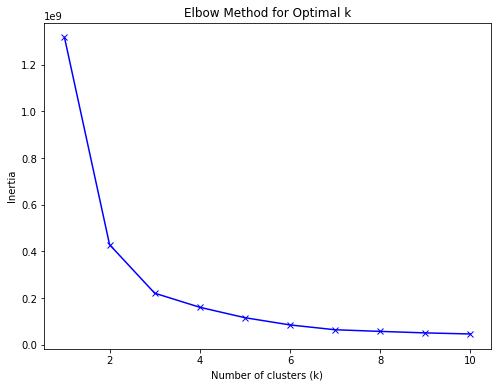

Cluster 0 - Mean: AtBat         361.304348
Hits           93.260870
HmRun           9.730435
Runs           48.260870
RBI            44.095652
Walks          36.034783
Years           4.130435
CAtBat       1023.304348
CHits         262.443478
CHmRun         25.113043
CRuns         133.730435
CRBI          116.834783
CWalks         98.460870
League          0.478261
Division        0.565217
PutOuts       274.000000
Assists       101.565217
Errors          8.391304
NewLeague       0.443478
Cluster         0.000000
dtype: float64, Median: AtBat        344.0
Hits          86.0
HmRun          8.0
Runs          43.0
RBI           39.0
Walks         33.0
Years          4.0
CAtBat       932.0
CHits        230.0
CHmRun        16.0
CRuns        117.0
CRBI         104.0
CWalks        80.0
League         0.0
Division       1.0
PutOuts      203.0
Assists       29.0
Errors         7.0
NewLeague      0.0
Cluster        0.0
dtype: float64, Count: 115
Cluster 1 - Mean: AtBat         443.103448
Hits    

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

optimal_k = 3 # Due to the elbow at k =3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X_train['Cluster'] = kmeans.fit_predict(X_train)
X_test['Cluster'] = kmeans.predict(X_test)

for cluster in range(optimal_k):
    cluster_data = X_train[X_train['Cluster'] == cluster]
    print(f'Cluster {cluster} - Mean: {cluster_data.mean()}, Median: {cluster_data.median()}, Count: {cluster_data.shape[0]}')

Build a sklearn parametric regression model to predict the target in each cluster. Average the MSE value of clusters. Explain whether the predictions improved or not.
Explain if applying the clustering analysis to build regression models helped the prediction.

In [6]:
cluster_mse = []

for cluster in range(optimal_k):
    cluster_train_data = X_train[X_train['Cluster'] == cluster]
    cluster_train_target = y_train[X_train['Cluster'] == cluster]
    cluster_test_data = X_test[X_test['Cluster'] == cluster]
    cluster_test_target = y_test[X_test['Cluster'] == cluster]
    
    linear_regression_model = LinearRegression()
    linear_regression_model.fit(cluster_train_data.drop(columns=['Cluster']), cluster_train_target)
    
    cluster_prediction = linear_regression_model.predict(cluster_test_data.drop(columns=['Cluster']))
    mse = mean_squared_error(cluster_test_target, cluster_prediction)
    cluster_mse.append(mse)
    print(f'Cluster {cluster} MSE: {mse}')

average_mse = sum(cluster_mse) / len(cluster_mse)
print(f'Average Cluster MSE: {average_mse}')
print(f'{mse_overall}')
print(f'Improve: {average_mse < mse_overall}')

Cluster 0 MSE: 156583.35585247414
Cluster 1 MSE: 301676.84289788327
Cluster 2 MSE: 77378.53795387284
Average Cluster MSE: 178546.24556807673
128284.34549672349
Improve: False


The average mse does not show improvement after clustering however the cluster 2 MSE is much lower than the overall mse of the linear regression model prior to clustering.